KARUNATHASAN Nilany <br>
DIA2

# **<center> WP1 - Machine Learning for NLP**


## Tokenisation

### Textes en phrases

In [ ]:
import nltk
nltk.download('punkt')
#test
#test2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.__version__

'3.8.1'

In [ ]:
tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
text=" Hello everyone. Hope all are fine and doing well. Hope you find the book interesting"
tokenizer.tokenize(text)

[' Hello everyone.',
 'Hope all are fine and doing well.',
 'Hope you find the book interesting']

Go on Google News and select 3 press articles (2 about the same topic and 1 really different).
Copy/paste the text content of each article in 3 separate files.
The goal is to find the two nearest sentences (in a meaning/semantic way) in the articles on the
same topic. The method used should also show a difference between the article on a different topic.
The possible tools used to achieve this result are been presented the last session (tokenization,
normalization, regular expressions, string distances).
Verify if your 3 articles respect the Zipf’s law.
Here under, you will find some examples of this tools with NLTK

#### Articles



1.   https://www.francetvinfo.fr/monde/conflit-dans-le-haut-karabakh/direct-haut-karabakh-le-secretaire-general-de-l-onu-appelle-a-un-arret-immediat-des-combats_6072765.html
2.   https://www.lemonde.fr/international/article/2023/09/20/haut-karabakh-l-azerbaidjan-et-les-separatistes-armeniens-annoncent-un-cessez-le-feu-et-l-ouverture-de-negociations_6190143_3210.html
3.  https://www.lemonde.fr/sport/article/2023/09/20/crise-a-l-olympique-de-marseille-le-club-annonce-le-depart-de-marcelino-son-entraineur-apres-seulement-sept-matchs_6190185_3242.html



##### Tokenization and Preprocessing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Tokenize the text into words, remove punctuation, and convert to lowercase
    words = [word.lower() for word in word_tokenize(text) if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('french'))
    filtered_words = [word for word in words if word not in stop_words]

    # Stem the words (optional)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    return sentences, filtered_words


In [ ]:
# Read and preprocess the content of the first article
with open('Article1.txt', 'r', encoding='utf-8') as file:
    text1 = file.read()

sentences1, words1 = preprocess_text(text1)

# Read and preprocess the content of the second article
with open('Article2.txt', 'r', encoding='utf-8') as file:
    text2 = file.read()

sentences2, words2 = preprocess_text(text2)

# Read and preprocess the content of the third article
with open('Article3.txt', 'r', encoding='utf-8') as file:
    text3 = file.read()

sentences3, words3 = preprocess_text(text3)

In [ ]:
sentences1

["Les combats initiés mardi au Haut-Karabakh par l'Azerbaïdjan, qui ont suscité l'inquiétude de la communauté internationale, ont causé la mort d'au moins 32 personnes.",
 "Ce qu'il faut savoir\nLes séparatistes arméniens du Haut-Karabakh ont annoncé mercredi 20 septembre qu'ils déposeront les armes dans le cadre d'un cessez-le-feu, confirmé par les autorités azerbaïdjanaises.",
 "Des négociations sur la réintégration de ce territoire disputé avec l'Arménie vont se tenir jeudi dans la ville azerbaïdjanaise de Yevlakh.",
 "Les combats, qui ont débuté mardi au Haut-Karabakh, ont fait au moins 32 morts, dont sept civils, et plus de 200 blessés, selon l'Arménie.",
 "De son côté, l'Azerbaïdjan avait rapporté que deux civils avaient péri dans les zones sous son contrôle.",
 'Suivez notre direct.',
 "Le Vatican et l'ONU demandent l'arrêt des combats.",
 'Le pape François a appelé, mercredi, à "faire taire les armes" et à "trouver des solutions pacifiques" au Haut-Karabakh.',
 'Le secrétaire g

In [ ]:
words1

['combats',
 'initiés',
 'mardi',
 'suscité',
 'communauté',
 'internationale',
 'causé',
 'mort',
 'moins',
 '32',
 'personnes',
 'faut',
 'savoir',
 'séparatistes',
 'arméniens',
 'annoncé',
 'mercredi',
 '20',
 'septembre',
 'déposeront',
 'armes',
 'cadre',
 'confirmé',
 'autorités',
 'azerbaïdjanaises',
 'négociations',
 'réintégration',
 'territoire',
 'disputé',
 'vont',
 'tenir',
 'jeudi',
 'ville',
 'azerbaïdjanaise',
 'yevlakh',
 'combats',
 'débuté',
 'mardi',
 'fait',
 'moins',
 '32',
 'morts',
 'dont',
 'sept',
 'civils',
 'plus',
 '200',
 'blessés',
 'selon',
 'côté',
 'rapporté',
 'deux',
 'civils',
 'péri',
 'zones',
 'sous',
 'contrôle',
 'suivez',
 'direct',
 'vatican',
 'demandent',
 'combats',
 'pape',
 'françois',
 'a',
 'appelé',
 'mercredi',
 'faire',
 'taire',
 'armes',
 'trouver',
 'solutions',
 'pacifiques',
 'secrétaire',
 'général',
 'antonio',
 'guterres',
 'a',
 'aussi',
 'demandé',
 'désescalade',
 'respect',
 'plus',
 'strict',
 '2020',
 'principes',
 'd

##### Check Zipf's Law

*Explanation of the law*

Imagine you have a large collection of words from a book, a website, or any text. Zipf's Law says that:

There are a few words that appear a lot, like "the," "and," and "in." These are the most common words in the text.

Then, there are many words that appear less often, like "apple," "cat," or "mountain." These are less common.

The pattern is like this: The most common word appears much more often than the second most common word, and the second most common word appears much more often than the third most common word, and so on.

Basically, it's a way to describe how words are used in languages. Some words are used all the time, while most words are used only occasionally.

Zipf's Law helps us understand that languages have patterns, and it's not just random words. It's like saying there's a "pecking order" for words, with a few at the top and many at the bottom in terms of how often they are used.

In simpler terms, Zipf's Law is a way to describe how words are distributed in texts, showing that some words are very common, and most words are not used as often

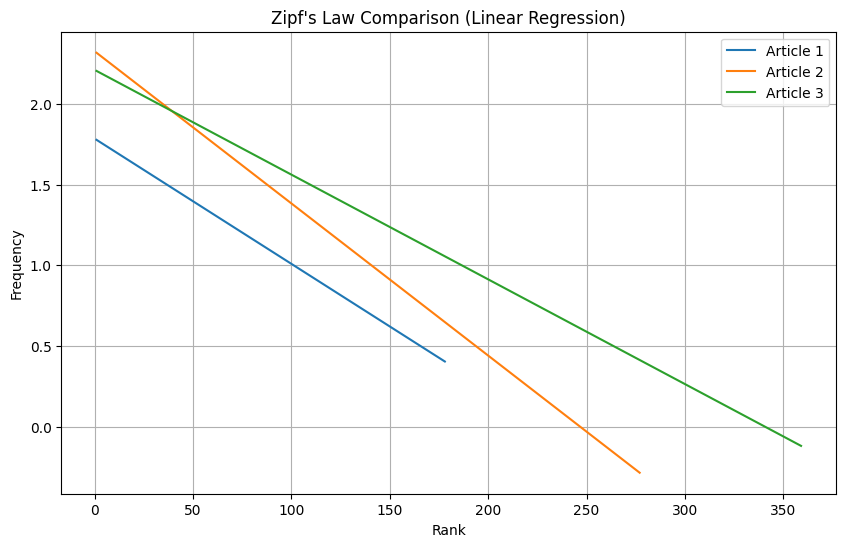

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy.stats import linregress

# Function to calculate the linear regression
def calculate_linear_regression(word_counts):
    # Sort the word frequencies
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

    # Extract the counts and ranks
    counts = [count for word, count in sorted_word_counts]
    ranks = range(1, len(counts) + 1)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(ranks, counts)

    return slope, intercept


# Calculate the linear regression for each article
slope1, intercept1 = calculate_linear_regression(Counter(words1))
slope2, intercept2 = calculate_linear_regression(Counter(words2))
slope3, intercept3 = calculate_linear_regression(Counter(words3))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot Zipf's Law for each article and add a legend
plt.plot(range(1, len(words1) + 1), [intercept1 + slope1 * x for x in range(1, len(words1) + 1)], label='Article 1')
plt.plot(range(1, len(words2) + 1), [intercept2 + slope2 * x for x in range(1, len(words2) + 1)], label='Article 2')
plt.plot(range(1, len(words3) + 1), [intercept3 + slope3 * x for x in range(1, len(words3) + 1)], label='Article 3')

# Add labels and legend
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law Comparison (Linear Regression)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


##### Model definition

In [ ]:
from gensim.models import Word2Vec


# Train Word2Vec model for Article 1
model1 = Word2Vec(sentences1, vector_size=300, window=5, min_count=1, sg=0)

# Train Word2Vec model for Article 2
model2 = Word2Vec(sentences2, vector_size=300, window=5, min_count=1, sg=0)

# Train Word2Vec model for Article 3
model3 = Word2Vec(sentences3, vector_size=300, window=5, min_count=1, sg=0)


model1.save("model1.w2v")
model2.save("model2.w2v")
model3.save("model3.w2v")


##### Calculate Semantic Similarity

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity


# Calculate the average vector for each sentence
def sentence_vector(sentence, model, num_features):
    words = sentence.split()
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in words:
        if word in model.wv.key_to_index:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

# Calculate sentence vectors for each sentence in the articles
num_features = 300
sent_vectors1 = [sentence_vector(sentence, model1, num_features) for sentence in sentences1]
sent_vectors2 = [sentence_vector(sentence, model2, num_features) for sentence in sentences2]
sent_vectors3 = [sentence_vector(sentence, model3, num_features) for sentence in sentences3]

# Calculate cosine similarity between sentences
similarities1_2 = cosine_similarity(sent_vectors1, sent_vectors2)
similarities1_3 = cosine_similarity(sent_vectors1, sent_vectors3)

print("Cosine similarity between Article 1 and Article 2:", similarities1_2)
print("Cosine similarity between Article 1 and Article 3:", similarities1_3)


Cosine similarity between Article 1 and Article 2: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.

The cell at row 7 and column 7 represents the similarity between a sentence in Article 1 (let's call it Sentence A1) and itself. This value is 1, which makes sense because any sentence is perfectly similar to itself.

The cell at row 7 and column 8 represents the similarity between Sentence A1 from Article 1 and a sentence (let's call it Sentence A2) from Article 2. This cell has a relatively high value, indicating that Sentence A1 and Sentence A2 are semantically similar. In other words, they convey similar meaning or context.

This observation suggests that Sentence A1 in Article 1 and Sentence A2 in Article 2 share common themes, topics, or information. They might be discussing the same subject matter or providing related information.

Overall, the cosine similarity score of this cell indicates a strong semantic connection between Sentence A1 and Sentence A2, supporting the idea that they are related in terms of content or context. This analysis can be extended to other cells in the matrix to identify other pairs of sentences with similar or dissimilar meanings across your articles

##### Find Nearest Sentences

In [ ]:
import numpy as np

# Find the two nearest sentences in Articles 1 and 2
indices1_2 = np.unravel_index(np.argmax(similarities1_2), similarities1_2.shape)
nearest_sentence1 = sentences1[indices1_2[0]]
nearest_sentence2 = sentences2[indices1_2[1]]

print("Nearest Sentence 1 (Article 1):", nearest_sentence1)
print("Nearest Sentence 2 (Article 2):", nearest_sentence2)


Nearest Sentence 1 (Article 1): La Russie a appelé, mercredi, à "cesser immédiatement l'effusion de sang, à mettre un terme aux hostilités et à arrêter les pertes civiles" dans la région.
Nearest Sentence 2 (Article 2): La Russie, dont un contingent de la paix est déployé dans le Haut-Karabakh depuis 2020, a joué un rôle crucial de médiateur dans la signature de ce cessez-le-feu.


##### Highlight the differences and similarities

In [ ]:
# Calculate sentence vectors for each article
num_features = 300

average_vector_article1 = np.mean(sent_vectors1, axis=0)
average_vector_article2 = np.mean(sent_vectors2, axis=0)
average_vector_article3 = np.mean(sent_vectors3, axis=0)

# Now you can calculate the Euclidean distances
distance_3_to_1 = euclidean_distances([average_vector_article3], [average_vector_article1])[0][0]
distance_3_to_2 = euclidean_distances([average_vector_article3], [average_vector_article2])[0][0]
distance_1_to_2 = euclidean_distances([average_vector_article1], [average_vector_article2])[0][0]

print("Euclidean Distance between Article 3 and Article 1:", distance_3_to_1)
print("Euclidean Distance between Article 3 and Article 2:", distance_3_to_2)
print("Euclidean Distance between Article 3 and Article 2:", distance_1_to_2)

Euclidean Distance between Article 3 and Article 1: 0.34025726
Euclidean Distance between Article 3 and Article 2: 0.5338877
Euclidean Distance between Article 3 and Article 2: 0.74960464
